# 决策树在 Python 中的实现

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# 加载数据
iris = load_iris()
X, y = iris.data, iris.target

# 训练决策树
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf.fit(X, y)

# 可视化决策树
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


# 基于快递公司的数据，使用决策树算法进行分类

测试集准确率: 1.0
混淆矩阵:
 [[1 0]
 [0 1]]


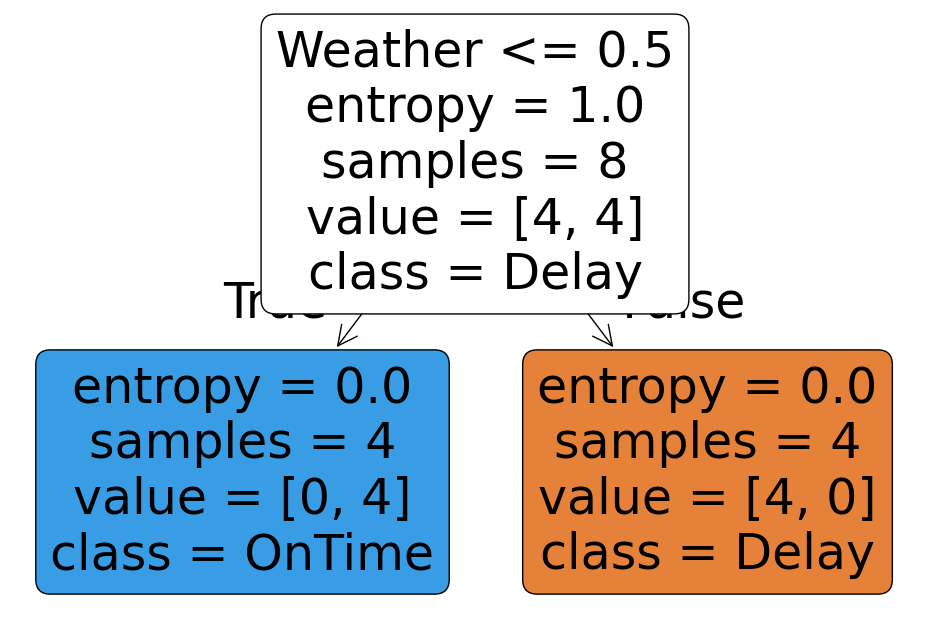

In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# 创建示例数据集（特征：交通情况、天气、快递员经验；标签：是否准时）
data = {
    '交通情况': ['拥堵', '一般', '畅通', '拥堵', '一般', '畅通', '拥堵', '一般', '畅通', '拥堵'],
    '天气': ['雨天', '雨天', '晴天', '晴天', '雨天', '晴天', '雨天', '晴天', '晴天', '雨天'],
    '快递员经验': ['低', '中', '高', '中', '低', '高', '中', '高', '低', '高'],
    '准时到达': ['否', '否', '是', '是', '否', '是', '否', '是', '是', '否']
}
df = pd.DataFrame(data)

# 分类特征编码, LabelEncoder 会扫描数据列中的所有唯一值，​按首次出现的顺序自动分配数字：
le = LabelEncoder()
df['交通情况'] = le.fit_transform(df['交通情况'])  # 拥堵:0, 一般:1, 畅通:2
df['天气'] = le.fit_transform(df['天气'])        # 雨天:0, 晴天:1
df['快递员经验'] = le.fit_transform(df['快递员经验']) # 低:0, 中:1, 高:2
df['准时到达'] = le.fit_transform(df['准时到达'])   # 否:0, 是:1

# 拆分特征和标签
X = df.drop('准时到达', axis=1)

y = df['准时到达']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建决策树模型（使用信息增益作为分裂标准）
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(X_train, y_train)

# 预测与评估
y_pred = model.predict(X_test)
print("测试集准确率:", accuracy_score(y_test, y_pred))
print("混淆矩阵:\n", confusion_matrix(y_test, y_pred))

# 绘制决策树
plt.figure(figsize=(12,8))
plot_tree(model, 
          feature_names=['Traffic', 'Weather', 'Experience'],
          class_names=['Delay', 'OnTime'],
          filled=True, 
          rounded=True)
plt.show()